In [1]:
import pandas as  pd
import numpy as np

In [2]:
#CCA---> complete case analysis

# df--->missing data---> filter missing data --->
# new_df=filterred_columns_in_which_we _have_missing__data

# new_df  ---> missing_data_drop

# Architecture ---> HIStogram --->
# past column in which  we  have missing data
# upload column in which we have no missing  data

# if past data architecture is  overlap  to new data architecture--->
# it means we can drop missing data.

# if  past data architecture is overlap to new data architecture--->
# it means we  can  drop missing data.

In [3]:
df=pd.read_csv("dsjob - dsjob.csv")

In [4]:
df.head(4)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39


In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [6]:
cols=[var for var in df.columns if  df[var].isnull().mean() <  0.5 and df[var].isnull().mean()>0]
cols

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [7]:
df[cols].sample(5)

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
804,NaN,NaN,NaN,NaN,11,100-500,NaN,never
496,Male,no_enrollment,Graduate,STEM,6,10000+,Pvt Ltd,1
130,NaN,no_enrollment,High School,NaN,<1,NaN,NaN,1
2091,Male,no_enrollment,High School,NaN,12,10/49,Early Stage Startup,1
1780,NaN,no_enrollment,NaN,NaN,2,NaN,NaN,never


In [8]:
df["education_level"].value_counts()

education_level
Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: count, dtype: int64

In [10]:
len(df[cols].dropna())/len(df)

0.47862846406763737

In [11]:
new_df=df[cols].dropna()
df.shape, new_df.shape

((2129, 13), (1019, 8))

In [12]:
import matplotlib.pyplot as plt

<Axes: >

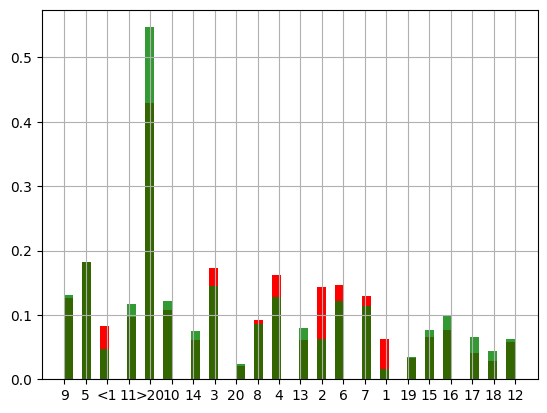

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)

# Original data
df["experience"].hist(bins=50 ,ax=ax,density=True ,color="red")

# data after cca,tehe argument alpha makes the color transparrent , so  we can 
# see the overlay of the 2 distributions
new_df["experience"].hist(bins=50,ax=ax,color="green",density=True,alpha=0.8)

In [17]:

temp=pd.concat([
    #percentage of  oberservation per category, original data
    df["enrolled_university"].value_counts()/len(df),

    # percentage of observation per category, cca data
    new_df["enrolled_university"].value_counts()/len(new_df)
],
     axis=1)
#add column names
temp.columns=["original","cca"]

temp
              

,original,cca
enrolled_university,,
no_enrollment,0.713481,0.830226
Full time course,0.204321,0.105986
Part time course,0.067637,0.063788


In [18]:
df=pd.read_csv("covid_toy - covid_toy.csv")

In [19]:
df["fever"].isnull().mean()*100

np.float64(10.0)

In [20]:
cols=[var for var in df.columns if  df[var].isnull().mean() <  0.5 and df[var].isnull().mean()>0]
cols

['fever']

In [21]:
len(df[cols].dropna())/len(df)

0.9

In [22]:
new_df=df[cols].dropna()
df.shape, new_df.shape

((100, 6), (90, 1))

<Axes: >

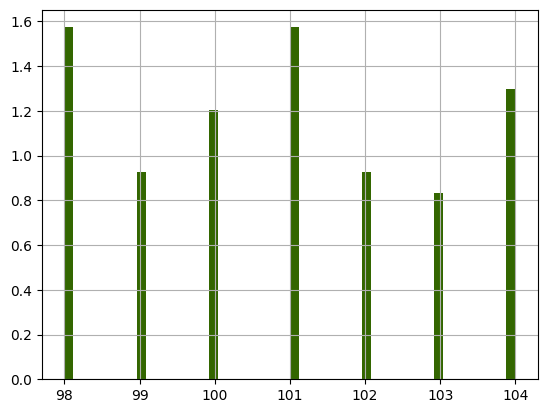

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
df["fever"].hist(bins=50 ,ax=ax,density=True ,color="red")
new_df["fever"].hist(bins=50,ax=ax,color="green",density=True,alpha=0.8)

In [27]:
df=pd.read_csv("titanic - titanic.csv")

In [28]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [34]:
cols=[var for var in df.columns if  df[var].isnull().mean() <  0.5 and df[var].isnull().mean()>0]
cols

['Age', 'Fare']

In [35]:
len(df[cols].dropna())/len(df)

0.7918660287081339

In [36]:
new_df=df[cols].dropna()
df.shape, new_df.shape

((418, 12), (331, 2))

<Axes: >

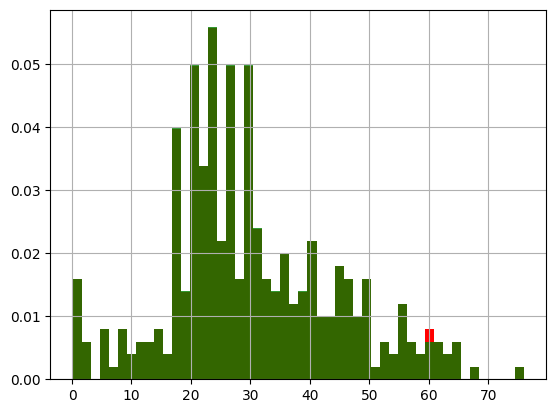

In [40]:
fig=plt.figure()
ax=fig.add_subplot(111)
df["Age"].hist(bins=50 ,ax=ax,density=True ,color="red")
new_df["Age"].hist(bins=50,ax=ax,color="green",density=True,alpha=0.8)

In [41]:
df=pd.read_csv("tips - tips.csv")

In [42]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [45]:
df.shape

(244, 7)

In [49]:
df.loc[100:200,["age","day"]]=None

In [52]:
df.isnull().mean()*10

total_bill     0.000000
tip            0.000000
sex            0.000000
smoker         0.000000
day            4.139344
time           0.000000
size           0.000000
age           10.000000
dtype: float64

In [51]:
cols=[var for var in df.columns if  df[var].isnull().mean() <  0.5 and df[var].isnull().mean()>0]
cols

['day']

In [53]:
len(df[cols].dropna())/len(df)

0.5860655737704918

In [54]:
new_df=df[cols].dropna()
df.shape, new_df.shape

((244, 8), (143, 1))

<Axes: >

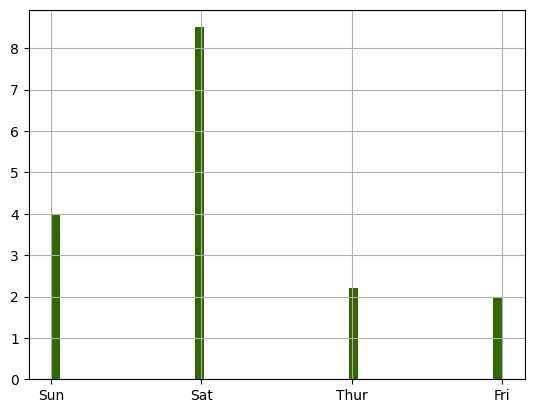

In [59]:
fig=plt.figure()
ax=fig.add_subplot(111)
df["day"].hist(bins=50 ,ax=ax,density=True ,color="red")
new_df["day"].hist(bins=50,ax=ax,color="green",density=True,alpha=0.8)